# Konopka Bartosz - grupa 2

# Wstęp


W poniższych zadaniach wykorzystaliśmy i badaliśmy sieci wielowarstwowe, korzystając z modelu MLPClassifier. Korzystając z odpowiednich zbiorów danych przetestowaliśmy zależności takie jak struktura sieci, skuteczność sieci w wielu problemach oraz wpływ różnych architektur sieci, funkcji aktywacji, ilości epok uczenia i algorytmów uczenia na wynik zadania.

In [32]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# ZAD 1


## Kod

Treść:

Proszę pobrać plik medicine.txt, zawierający wyniki analizy nowego leku. W dwóch pierwszych kolumnach znajduje się stężenie dwóch składników w próbce krwi, w trzeciej - informacja o tym, czy lek zadziałał. Dane nie są znormalizowane. Proszę znormalizować dane, podzielić je na zbiór uczący i testujący w proporcjach 80-20 (należy pamiętać o proporcjach klas), zaproponować wielowarstwową sieć neuronową i zbadać jej skuteczność dla różnych ilości warstw i neuronów w tych warstwach. Proszę narysować w jaki sposób sieć dokonała podziału w zbiorze dla kilku sieci (zarówno tych z dobrymi, jak i złymi wynikami) oraz jak wygląda poprawny podział zbioru. Proszę również przedstawić wyniki dla 5-8 różnych struktur sieci, wraz z oceną, która z nich najlepiej poradziła sobie z zadaniem klasyfikacji.

In [2]:
data_medicine = pd.read_csv('medicine.txt', sep = ',', header = None)
data_medicine = data_medicine.drop(0)

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data_medicine.iloc[:,0:2])
Y = data_medicine.iloc[:,2]
Y = Y.to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size=0.2)

score:  0.8763940520446096


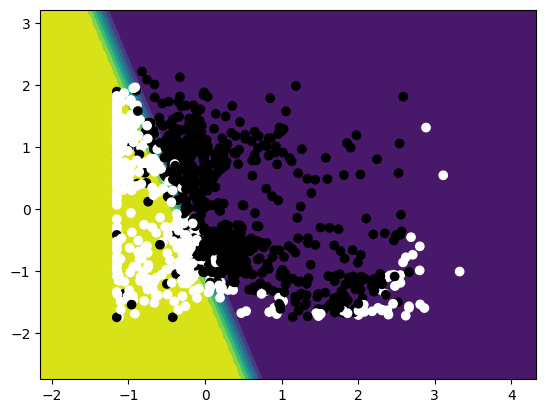

score:  0.904275092936803


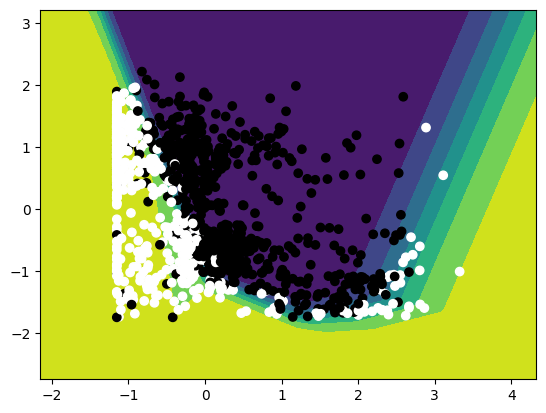

score:  0.9070631970260223


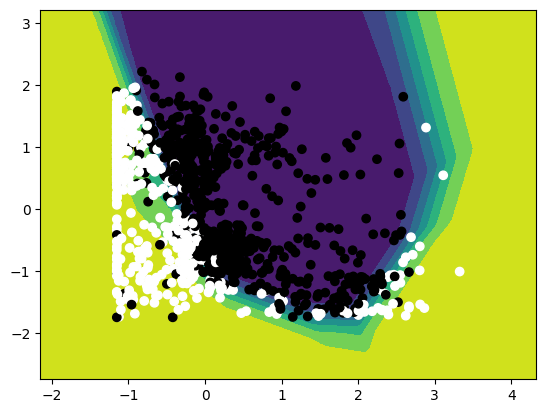

score:  0.9079925650557621


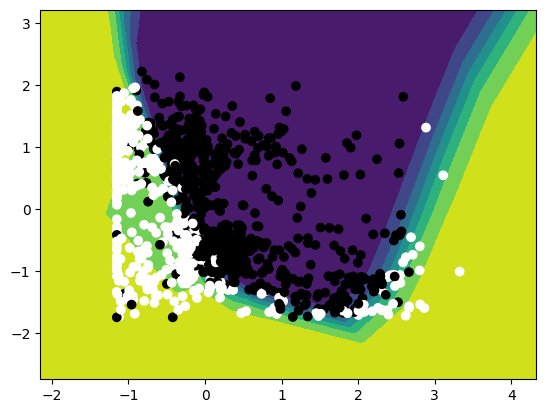

score:  0.9089219330855018


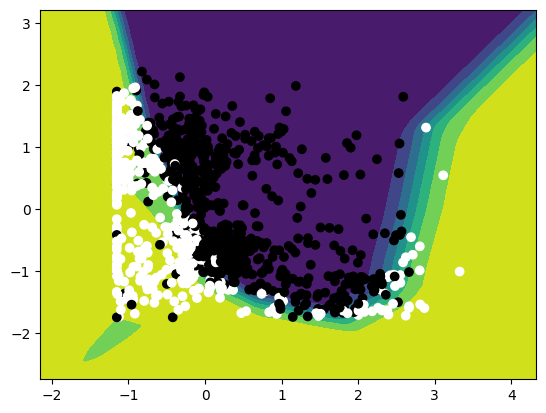

score:  0.8977695167286245


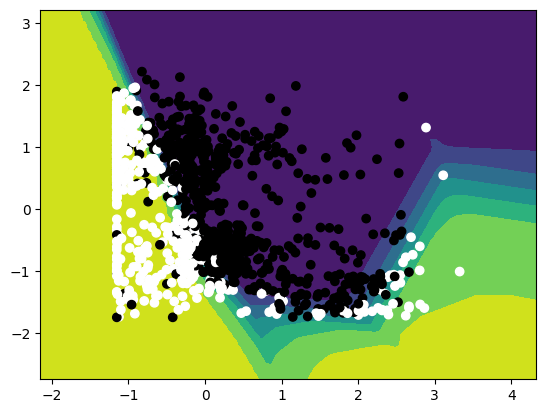

score:  0.912639405204461


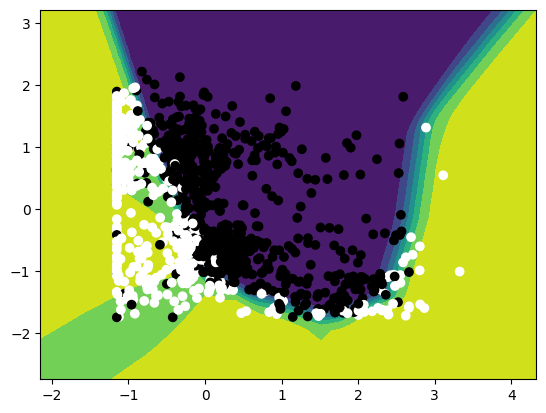

score:  0.9154275092936803


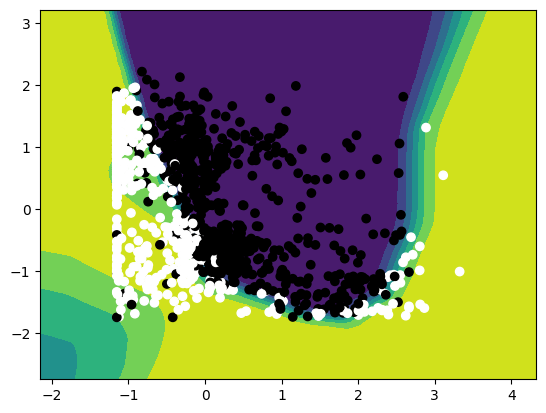

In [3]:
layers = [(1,1), (5,5), (10,5), (10,10), (50,20), (10,5,2), (50,20,5), (100,50,20)]

for i in layers:
  model = MLPClassifier(hidden_layer_sizes = i, max_iter=2000)
  model.fit(X_train, Y_train)
  display = DecisionBoundaryDisplay.from_estimator(model, X_train, cmap='viridis')
  plt.scatter(X_train[:,0],X_train[:,1], c=Y_train)

  predicted_labels = model.predict(X_test)
  print("score: ", model.score(X_train,Y_train))

  plt.show()


## Wnioski

W eksperymencie z klasyfikacją nowego leku za pomocą wielowarstwowej sieci neuronowej, różne konfiguracje sieci przynosiły zróżnicowane wyniki skuteczności. W przypadku prostszych struktur, składających się z jednej lub dwóch warstw o mniejszej liczbie neuronów, skuteczność była niższa. Jednak złożone modele z większą liczbą warstw i neuronów wykazywały tendencję do poprawy skuteczności. W niektórych przypadkach zwiększenie złożoności sieci nie przynosiło istotnej poprawy wyników. Najlepsze rezultaty uzyskano przy modelu z trzema warstwami (100, 50, 20), osiągając accuracy na poziomie 0.915.

# ZAD 2


## Kod

Treść:

Proszę pobrać zbiór ręcznie pisanych cyfr z https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits (można to zrobić funkcją datasets.load_digits() w sklearnie). Proszę sprawdzić skuteczność klasyfikacji na tym zbiorze za pomocą wielowarstwowej sieci neuronowej.

In [4]:
data_digits = datasets.load_digits()

X = data_digits.data
Y = data_digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size=0.2)

In [5]:
model = MLPClassifier(solver = "sgd", hidden_layer_sizes=(100,50), max_iter = 1000, tol = 0.001, activation = 'identity')

model.fit(X_train,Y_train)
predicted_labels = model.predict(X_train)

print(confusion_matrix(Y_train, predicted_labels))
print(model.score(X_test,Y_test))

[[142   0   0   0   0   0   0   0   0   0]
 [  0 145   0   0   1   0   0   0   0   0]
 [  0   0 142   0   0   0   0   0   0   0]
 [  0   0   0 146   0   0   0   0   0   0]
 [  0   0   0   0 145   0   0   0   0   0]
 [  0   0   0   0   0 144   0   0   0   1]
 [  0   0   0   0   0   0 145   0   0   0]
 [  0   0   0   0   0   0   0 143   0   0]
 [  0   1   0   0   0   0   0   0 138   0]
 [  0   0   0   0   0   0   0   0   1 143]]
0.9638888888888889


## Wnioski

Skuteczność klasyfikacji na zbiorze ręcznie pisanych cyfr za pomocą wielowarstwowej sieci neuronowej wynosiła 0.9638888888888889 na zbiorze testowym. Jest to bardzo wysoki wynik, co sugeruje, że model dobrze radzi sobie z zadaniem rozpoznawania cyfr na podstawie obrazów.

# ZAD 3

## Kod

Treść:

Proszę sprawdzić, jak zmieni się poprawność klasyfikacji na zbiorze ręcznie pisanych cyfr dla różnych architektur sieci, funkcji aktywacji, ilości epok uczenia i algorytmów uczenia. Proszę zbadać wpływ współczynnika uczenia (learning_rate) podczas używania algorytmu SGD. Dla najciekawszych przykładów proszę wypisać macierze pomyłek.

In [6]:
data_digits = datasets.load_digits()

X = data_digits.data
Y = data_digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size=0.2)

In [7]:
architectures = [(10, 5,5,5), (10, 5,5,5,5), (10, 5,5,5,5,5)]
activation_functions = ['relu', 'logistic', 'tanh']
epochs = [500, 1000, 2000]
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['sgd']
i = 0

for architecture in architectures:
    for activation_function in activation_functions:
        for epoch in epochs:
            for learning_rate in learning_rates:
                for optimizer in optimizers:
                    model = MLPClassifier(hidden_layer_sizes=architecture, activation=activation_function, max_iter=epoch, learning_rate_init=learning_rate, solver=optimizer)
                    model.fit(X_train, Y_train)

                    test_accuracy = model.score(X_test, Y_test)
                    print(f"Number: {i}, Architecture: {architecture}, Activation: {activation_function}, Epochs: {epoch}, Learning Rate: {learning_rate}, Optimizer: {optimizer}")
                    print(f"Test Accuracy: {test_accuracy}")

                    if i % 10 == 0:
                      Y_pred = model.predict(X_test)
                      matrix = confusion_matrix(Y_test, Y_pred)
                      print("Confusion Matrix:")
                      print(matrix)
                    print()

                    i+=1



Number: 0, Architecture: (10, 5, 5, 5), Activation: relu, Epochs: 500, Learning Rate: 0.1, Optimizer: sgd
Test Accuracy: 0.20277777777777778
Confusion Matrix:
[[36  0  0  0  0  0  0  0  0  0]
 [26  2  6  0  0  0  0  0  3  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 1  0 36  0  0  0  0  0  0  0]
 [32  1  3  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  1  0]
 [36  0  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  1  0]
 [ 2  0 33  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]]

Number: 1, Architecture: (10, 5, 5, 5), Activation: relu, Epochs: 500, Learning Rate: 0.01, Optimizer: sgd
Test Accuracy: 0.3416666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number: 2, Architecture: (10, 5, 5, 5), Activation: relu, Epochs: 500, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.75

Number: 3, Architecture: (10, 5, 5, 5), Activation: relu, Epochs: 1000, Learning Rate: 0.1, Optimizer: sgd
Test Accuracy: 0.10277777777777777

Number: 4, Architecture: (10, 5, 5, 5), Activation: relu, Epochs: 1000, Learning Rate: 0.01, Optimizer: sgd
Test Accuracy: 0.6916666666666667

Number: 5, Architecture: (10, 5, 5, 5), Activation: relu, Epochs: 1000, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.7888888888888889

Number: 6, Architecture: (10, 5, 5, 5), Activation: relu, Epochs: 2000, Learning Rate: 0.1, Optimizer: sgd
Test Accuracy: 0.1

Number: 7, Architecture: (10, 5, 5, 5), Activation: relu, Epochs: 2000, Learning Rate: 0.01, Optimizer: sgd
Test Accuracy: 0.8944444444444445

Number: 8, Architecture: (10, 5, 5, 5), Activation: relu, Epochs: 2000, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.7805555555555556

Number: 9, Architecture: (1

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number: 20, Architecture: (10, 5, 5, 5), Activation: tanh, Epochs: 500, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.6888888888888889
Confusion Matrix:
[[35  0  0  0  0  0  0  0  0  1]
 [ 0 33  0  0  3  0  0  1  0  0]
 [ 0  1  0  3  0  0  0  0  2 29]
 [ 0  1  0 26  0  0  0  0  2  8]
 [ 0  3  0  1 32  0  0  0  0  0]
 [ 3  0  0  0  0 26  0  6  0  1]
 [ 3  0  0  0  1  0 32  0  0  0]
 [ 0  0  0  0  0  2  0 31  0  3]
 [ 0  5  0 20  0  0  0  0  5  5]
 [ 0  0  0  2  0  0  0  3  3 28]]

Number: 21, Architecture: (10, 5, 5, 5), Activation: tanh, Epochs: 1000, Learning Rate: 0.1, Optimizer: sgd
Test Accuracy: 0.7416666666666667

Number: 22, Architecture: (10, 5, 5, 5), Activation: tanh, Epochs: 1000, Learning Rate: 0.01, Optimizer: sgd
Test Accuracy: 0.9166666666666666



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Number: 23, Architecture: (10, 5, 5, 5), Activation: tanh, Epochs: 1000, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.8916666666666667

Number: 24, Architecture: (10, 5, 5, 5), Activation: tanh, Epochs: 2000, Learning Rate: 0.1, Optimizer: sgd
Test Accuracy: 0.625

Number: 25, Architecture: (10, 5, 5, 5), Activation: tanh, Epochs: 2000, Learning Rate: 0.01, Optimizer: sgd
Test Accuracy: 0.8277777777777777

Number: 26, Architecture: (10, 5, 5, 5), Activation: tanh, Epochs: 2000, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.8472222222222222

Number: 27, Architecture: (10, 5, 5, 5, 5), Activation: relu, Epochs: 500, Learning Rate: 0.1, Optimizer: sgd
Test Accuracy: 0.2916666666666667

Number: 28, Architecture: (10, 5, 5, 5, 5), Activation: relu, Epochs: 500, Learning Rate: 0.01, Optimizer: sgd
Test Accuracy: 0.24166666666666667



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number: 29, Architecture: (10, 5, 5, 5, 5), Activation: relu, Epochs: 500, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.7555555555555555

Number: 30, Architecture: (10, 5, 5, 5, 5), Activation: relu, Epochs: 1000, Learning Rate: 0.1, Optimizer: sgd
Test Accuracy: 0.1
Confusion Matrix:
[[ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]]

Number: 31, Architecture: (10, 5, 5, 5, 5), Activation: relu, Epochs: 1000, Learning Rate: 0.01, Optimizer: sgd
Test Accuracy: 0.49166666666666664

Number: 32, Architecture: (10, 5, 5, 5, 5), Activation: relu, Epochs: 1000, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.875

Number: 33, Architecture: (10, 5, 5, 5, 5), Activation: relu, Epochs: 2000, Learning Rate:

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number: 47, Architecture: (10, 5, 5, 5, 5), Activation: tanh, Epochs: 500, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.5555555555555556

Number: 48, Architecture: (10, 5, 5, 5, 5), Activation: tanh, Epochs: 1000, Learning Rate: 0.1, Optimizer: sgd
Test Accuracy: 0.44722222222222224

Number: 49, Architecture: (10, 5, 5, 5, 5), Activation: tanh, Epochs: 1000, Learning Rate: 0.01, Optimizer: sgd
Test Accuracy: 0.8



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Number: 50, Architecture: (10, 5, 5, 5, 5), Activation: tanh, Epochs: 1000, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.8694444444444445
Confusion Matrix:
[[35  0  1  0  0  0  0  0  0  0]
 [ 0 29  2  0  3  0  0  1  1  1]
 [ 0  4 31  0  0  0  0  0  0  0]
 [ 0  0  1 31  0  0  1  1  0  3]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  1  0 34  1  0  0  0]
 [ 0  1  0  1  0  0 33  0  1  0]
 [ 0  0  0  1  0  0  0 35  0  0]
 [ 0  2  1  2  0  0  2  1 21  6]
 [ 1  4  0  0  1  0  0  0  1 29]]

Number: 51, Architecture: (10, 5, 5, 5, 5), Activation: tanh, Epochs: 2000, Learning Rate: 0.1, Optimizer: sgd
Test Accuracy: 0.5138888888888888

Number: 52, Architecture: (10, 5, 5, 5, 5), Activation: tanh, Epochs: 2000, Learning Rate: 0.01, Optimizer: sgd
Test Accuracy: 0.8666666666666667

Number: 53, Architecture: (10, 5, 5, 5, 5), Activation: tanh, Epochs: 2000, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.6944444444444444

Number: 54, Architecture: (10, 5, 5, 5, 5, 5), Activation: rel

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Number: 74, Architecture: (10, 5, 5, 5, 5, 5), Activation: tanh, Epochs: 500, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.6333333333333333

Number: 75, Architecture: (10, 5, 5, 5, 5, 5), Activation: tanh, Epochs: 1000, Learning Rate: 0.1, Optimizer: sgd
Test Accuracy: 0.09722222222222222

Number: 76, Architecture: (10, 5, 5, 5, 5, 5), Activation: tanh, Epochs: 1000, Learning Rate: 0.01, Optimizer: sgd
Test Accuracy: 0.8222222222222222



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Number: 77, Architecture: (10, 5, 5, 5, 5, 5), Activation: tanh, Epochs: 1000, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.7222222222222222

Number: 78, Architecture: (10, 5, 5, 5, 5, 5), Activation: tanh, Epochs: 2000, Learning Rate: 0.1, Optimizer: sgd
Test Accuracy: 0.19166666666666668

Number: 79, Architecture: (10, 5, 5, 5, 5, 5), Activation: tanh, Epochs: 2000, Learning Rate: 0.01, Optimizer: sgd
Test Accuracy: 0.6333333333333333

Number: 80, Architecture: (10, 5, 5, 5, 5, 5), Activation: tanh, Epochs: 2000, Learning Rate: 0.001, Optimizer: sgd
Test Accuracy: 0.7416666666666667
Confusion Matrix:
[[35  0  0  0  0  0  1  0  0  0]
 [ 0 35  0  0  0  0  1  0  1  0]
 [ 0  0 31  0  0  4  0  0  0  0]
 [ 0  0  0  1  0 34  0  0  0  2]
 [ 0  0  0  0 34  0  0  0  0  2]
 [ 0  0  2  1  0 29  0  1  0  3]
 [ 2  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  2]
 [ 1  4  1  0  0 23  0  0  6  0]
 [ 0  0  0  1  0  4  0  3  0 28]]



## Wnioski

W naszych badaniach różnych architektur sieci neuronowych zauważono, że dodawanie dodatkowych warstw i neuronów może potencjalnie poprawić skuteczność klasyfikacji. Jednakże, nie zawsze większa złożoność przekładała się na lepsze wyniki. Przetestowano trzy funkcje aktywacji: relu, logistic i tanh, z czego relu często wydawała się dawać najlepsze wyniki, choć ostatecznie wybór funkcji aktywacji zależy od specyfiki danych. Dodatkowo, badano wpływ liczby epok uczenia (500, 1000, 2000) i współczynnika uczenia (0.1, 0.01, 0.001) na skuteczność klasyfikacji. Wyniki sugerują, że zwiększenie liczby epok może poprawić skuteczność, ale tylko do pewnego punktu, po którym dalsze zwiększanie nie przynosi dodatkowych korzyści lub prowadzi do nadmiernej złożoności modelu. Podobnie, wybór odpowiedniego współczynnika uczenia jest kluczowy, zbyt duży prowadzi do nadmiernej zmienności, a zbyt mały do wolnego uczenia się modelu.

# ZAD 4

## Kod

Treść:

Proszę pobrać zbiór yeast z UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Yeast). Proszę we własnym zakresie dokonać wstępnej analizy i przygotowania tego zbioru (uwaga, wymagana jest zamiana etykiet tekstowych w ostatniej kolumnie na liczbowe - można je zamienić ręcznie albo przy użyciu takich narzędzi jak https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html, należy jednak pamiętać, że nie musi on ułożyć tych etykiet po kolei). Warto zauważyć, że liczności różnych klas wewnątrz zbioru są bardzo nierówne. Proszę spróbować osiągnąć jak najlepsze wyniki i narysować dla nich macierz pomyłek (dla zbioru uczącego i testującego). Czy trafność na poziomie 0.5 dla takiego zbioru jest dobra? Mogą państwo zbadać też czas wykonywania funkcji fit dla różnych konfiguracji sieci.

In [26]:
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"
data = pd.read_csv(url1, header=None, delimiter=r"\s+")

X = data.iloc[:, 1:-1]
Y = data.iloc[:, -1]

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)


In [33]:
model = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', max_iter=1000, random_state=42)

start_time = time.time()
model.fit(X_train, Y_train)
end_time = time.time()
training_time = end_time - start_time

train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Training Time: {training_time} seconds")

Y_pred_train = model.predict(X_train)
cm_train = confusion_matrix(Y_train, Y_pred_train)
Y_pred_test = model.predict(X_test)
cm_test = confusion_matrix(Y_test, Y_pred_test)

print("Train confusion matrix: \n", cm_train)
print("Test confusion matrix: \n", cm_test)

Train Accuracy: 0.6444818871103623
Test Accuracy: 0.6094276094276094
Training Time: 6.54625391960144 seconds
Train confusion matrix: 
 [[249   0   0   0   1   3  22  91   1   0]
 [  0   5   0   0   0   0   0   0   0   0]
 [  3   0  18   4   1   0   1   0   0   0]
 [  0   0   5  28   1   1   1   0   0   0]
 [  6   0   5   5  20   4   2   3   0   0]
 [  8   0   0   0   1 109   3   8   0   0]
 [ 52   0   0   1   4   5 114  16   0   0]
 [100   0   1   0   2  12  15 214   0   0]
 [  6   0   2   0   0   0   2   0   8   0]
 [ 12   0   1   0   2   6   1   2   0   0]]
Test confusion matrix: 
 [[59  1  0  0  1  5 30  0  0]
 [ 1  4  0  1  0  1  1  0  0]
 [ 0  3  4  1  0  0  0  0  0]
 [ 0  0  1  3  0  1  1  0  0]
 [ 1  0  0  0 29  0  4  0  0]
 [12  1  0  1  2 29  7  0  0]
 [27  0  0  1  1  5 51  0  0]
 [ 0  0  0  0  0  0  0  2  0]
 [ 1  1  0  0  0  1  3  0  0]]


## Wnioski

Skuteczność klasyfikacji na zbiorze testowym wynosiła około 0.609, a na zbiorze treningowym - około 0.644. Trafność na poziomie 0.5 dla takiego zbioru danych jest niezadowalająca, co sugeruje, że model nie radzi sobie dobrze z zadaniem klasyfikacji w tym przypadku. Analiza macierzy pomyłek pozwala zidentyfikować klasy, które są gorzej klasyfikowane przez model, co może być przydatne w dalszej optymalizacji. Warto zauważyć, że niektóre klasy mają znacznie więcej błędów klasyfikacji niż inne.